## CNN Model TA-D4TI 05 ( 100 Epoch ) Model B

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import cv2, os
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

## Set Directory Dataset American Sign Language

In [3]:
train_dir = 'mydata/train_blackwhite/'
train_folders = os.listdir(train_dir)
test_dir = 'mydata/test_blackwhite/'
test_files = os.listdir(test_dir)

## Membangun CNN ModelB

In [4]:
# Part 1 Building the CNN
# Importing the Keras libraries and packages


# Images Dimensions
img_width, img_height = 200, 200
train_data_dir = 'mydata/train_blackwhite'
test_data_dir = 'mydata/test_blackwhite'
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Conv2D(32, (5, 5), 
                      activation = "relu", 
                      input_shape = (200, 200, 3)))
# Parameter pertama (32) adalah nilai filter nya
# Parameter kedua adalah dimensi filter nya (3×3)
# Parameter ketiga adalah fungsi aktivasi yang kita gunakan (relu)
# Parameter keempat self explained yaitu bentuk input nya dan tipe nya

# Step 2 - Pooling, Pooling bertujuan untuk mereduksi ukuran gambar
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Conv2D(32, (5, 5), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding 3rd Concolution Layer
classifier.add(Conv2D(64, (5, 5), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding 4rd Concolution Layer ( New Layer )
classifier.add(Conv2D(64, (4, 4), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Step 3 - Flattening
# Data pooling yang kita miliki berupa array 2 dimensi kemudian dikonversi menjadi data satu dimensi single vector
classifier.add(Flatten())

# Step 4 - Full Connection
# Dense adalah fungsi untuk menambahkan layer yang fully connected.
# Parameter 1 (units)menandakan jumlah node yang harus ada di hidden layer,
# nilainya antara jumlah input node dan output node
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(29, activation = "softmax"))

# Compiling The CNN,optimizer yang digunakan Stochastic Gradient Descent dengan learning rate 0.01 
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


## Identifikasi Directory Train_set

In [5]:
x_train, y_train = [], []
for folder in train_folders:
    files = os.listdir(train_dir + folder)
    print('Reading images from ' + train_dir + folder + '/ ...')
    for file in files[:87000]:
        img = cv2.imread(train_dir + folder + '/' + file)
        img = cv2.resize(img, (200, 200))
        x_train.append(img)
        y_train.append(folder)

Reading images from mydata/train_blackwhite/A/ ...
Reading images from mydata/train_blackwhite/B/ ...
Reading images from mydata/train_blackwhite/C/ ...
Reading images from mydata/train_blackwhite/D/ ...
Reading images from mydata/train_blackwhite/del/ ...
Reading images from mydata/train_blackwhite/E/ ...
Reading images from mydata/train_blackwhite/F/ ...
Reading images from mydata/train_blackwhite/G/ ...
Reading images from mydata/train_blackwhite/H/ ...
Reading images from mydata/train_blackwhite/I/ ...
Reading images from mydata/train_blackwhite/J/ ...
Reading images from mydata/train_blackwhite/K/ ...
Reading images from mydata/train_blackwhite/L/ ...
Reading images from mydata/train_blackwhite/M/ ...
Reading images from mydata/train_blackwhite/N/ ...
Reading images from mydata/train_blackwhite/nothing/ ...
Reading images from mydata/train_blackwhite/O/ ...
Reading images from mydata/train_blackwhite/P/ ...
Reading images from mydata/train_blackwhite/Q/ ...
Reading images from myd

## Identifikasi Directory Test_set

In [6]:
x_train, y_train = [], []
for folder in train_folders:
    files = os.listdir(test_dir + folder)
    print('Reading images from ' + test_dir + folder + '/ ...')
    for file in files[:87000]:
        img = cv2.imread(test_dir + folder + '/' + file)
        img = cv2.resize(img, (200, 200))
        x_train.append(img)
        y_train.append(folder)

Reading images from mydata/test_blackwhite/A/ ...
Reading images from mydata/test_blackwhite/B/ ...
Reading images from mydata/test_blackwhite/C/ ...
Reading images from mydata/test_blackwhite/D/ ...
Reading images from mydata/test_blackwhite/del/ ...
Reading images from mydata/test_blackwhite/E/ ...
Reading images from mydata/test_blackwhite/F/ ...
Reading images from mydata/test_blackwhite/G/ ...
Reading images from mydata/test_blackwhite/H/ ...
Reading images from mydata/test_blackwhite/I/ ...
Reading images from mydata/test_blackwhite/J/ ...
Reading images from mydata/test_blackwhite/K/ ...
Reading images from mydata/test_blackwhite/L/ ...
Reading images from mydata/test_blackwhite/M/ ...
Reading images from mydata/test_blackwhite/N/ ...
Reading images from mydata/test_blackwhite/nothing/ ...
Reading images from mydata/test_blackwhite/O/ ...
Reading images from mydata/test_blackwhite/P/ ...
Reading images from mydata/test_blackwhite/Q/ ...
Reading images from mydata/test_blackwhite

## Training Model B

In [7]:
model = classifier.fit_generator(
        training_set,
        steps_per_epoch=960, # jumlah step baru
        epochs=100, #jumlah epoch baru
        validation_data = test_set,
        validation_steps = 2600 # jumlah validation baru 
      )

# Menyimpan hasil training model ke file h5
import h5py
classifier.save('New Mode B(960 , 2600 ).h5')

print(model.history.keys())

Epoch 1/100
960/960 [==============================] - 2623s 3s/step - loss: 3.2102 - acc: 0.1107 - val_loss: 2.4851 - val_acc: 0.3212
Epoch 2/100
960/960 [==============================] - 2616s 3s/step - loss: 2.5064 - acc: 0.2526 - val_loss: 1.2747 - val_acc: 0.6320
Epoch 3/100
960/960 [==============================] - 2622s 3s/step - loss: 1.9531 - acc: 0.3883 - val_loss: 0.7182 - val_acc: 0.7887
Epoch 4/100
960/960 [==============================] - 2624s 3s/step - loss: 1.6156 - acc: 0.4820 - val_loss: 0.4158 - val_acc: 0.8871
Epoch 5/100
960/960 [==============================] - 2625s 3s/step - loss: 1.3734 - acc: 0.5515 - val_loss: 0.2975 - val_acc: 0.9188
Epoch 6/100
960/960 [==============================] - 2625s 3s/step - loss: 1.2237 - acc: 0.5990 - val_loss: 0.2197 - val_acc: 0.9371
Epoch 7/100
960/960 [==============================] - 2625s 3s/step - loss: 1.0914 - acc: 0.6363 - val_loss: 0.1453 - val_acc: 0.9601
Epoch 8/100
960/960 [==============================] - 

Epoch 61/100
960/960 [==============================] - 2628s 3s/step - loss: 0.1618 - acc: 0.9436 - val_loss: 3.5606e-04 - val_acc: 1.0000
Epoch 62/100
960/960 [==============================] - 2629s 3s/step - loss: 0.1624 - acc: 0.9448 - val_loss: 3.9877e-04 - val_acc: 1.0000
Epoch 63/100
960/960 [==============================] - 2627s 3s/step - loss: 0.1555 - acc: 0.9471 - val_loss: 3.2016e-04 - val_acc: 1.0000
Epoch 64/100
960/960 [==============================] - 2629s 3s/step - loss: 0.1549 - acc: 0.9451 - val_loss: 2.7931e-04 - val_acc: 1.0000
Epoch 65/100
960/960 [==============================] - 2630s 3s/step - loss: 0.1513 - acc: 0.9483 - val_loss: 9.4735e-04 - val_acc: 0.9998
Epoch 66/100
960/960 [==============================] - 2628s 3s/step - loss: 0.1461 - acc: 0.9510 - val_loss: 4.1514e-04 - val_acc: 0.9999
Epoch 67/100
960/960 [==============================] - 2630s 3s/step - loss: 0.1440 - acc: 0.9496 - val_loss: 2.8376e-04 - val_acc: 0.9999
Epoch 68/100
960/960

### Validation step 2600 dan Step per epoch 960

## Grafik Akurasi

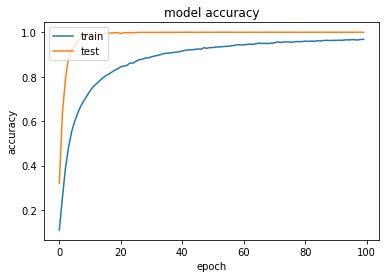

In [8]:
import matplotlib.pyplot as plt
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Grafik Loss

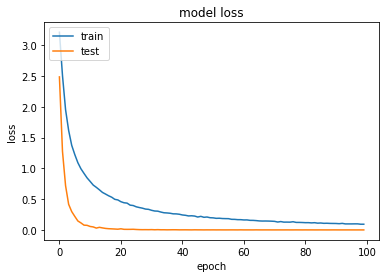

In [9]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()